# Importing some libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Droping unneccessry columns

In [4]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

# Creating bins for Age columns

In [5]:
from sklearn.preprocessing import KBinsDiscretizer
bined=KBinsDiscretizer(encode='ordinal',strategy='uniform',dtype=None)

In [6]:
df['age_bin']=bined.fit_transform(df[['Age']])

<Axes: >

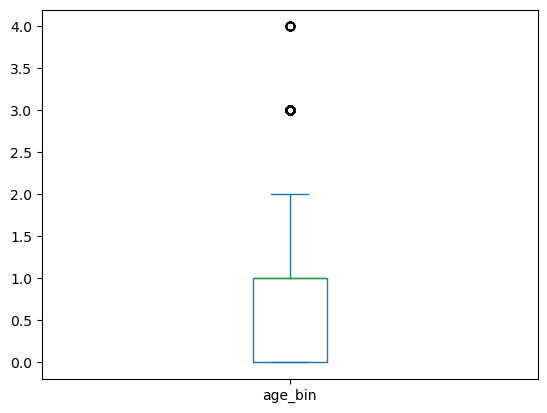

In [7]:
df['age_bin'].plot(kind='box')

In [8]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
age_bin               5
dtype: int64

In [9]:
df['age_bin'].value_counts()

age_bin
1.0    5500
0.0    2790
2.0    1351
3.0     335
4.0      24
Name: count, dtype: int64

In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_bin'],
      dtype='object')

In [11]:
df.drop(columns=['Age'],inplace=True)

In [12]:
X = df.drop(columns=['Exited']).values
y = df['Exited'].values

In [13]:
X

array([[619, 'France', 'Female', ..., 1, 101348.88, 1.0],
       [608, 'Spain', 'Female', ..., 1, 112542.58, 1.0],
       [502, 'France', 'Female', ..., 0, 113931.57, 1.0],
       ...,
       [709, 'France', 'Female', ..., 1, 42085.58, 1.0],
       [772, 'Germany', 'Male', ..., 0, 92888.52, 1.0],
       [792, 'France', 'Female', ..., 0, 38190.78, 0.0]], dtype=object)

# One hot encoding

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('onehot',OneHotEncoder(),[1])],remainder='passthrough')

In [15]:
X = ct.fit_transform(X)


In [16]:
ct = ColumnTransformer(transformers=[('onehot',OneHotEncoder(),[4])],remainder='passthrough')
X = ct.fit_transform(X)


In [17]:
X[4]

array([1.0, 0.0, 0.0, 0.0, 1.0, 850, 2, 125510.82, 1, 1, 1, 79084.1, 1.0],
      dtype=object)

In [18]:
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
X = sta.fit_transform(X)

In [19]:
X

array([[ 1.09598752, -1.09598752,  0.99720391, ...,  0.97024255,
         0.02188649,  0.09274048],
       [ 1.09598752, -1.09598752, -1.00280393, ...,  0.97024255,
         0.21653375,  0.09274048],
       [ 1.09598752, -1.09598752,  0.99720391, ..., -1.03067011,
         0.2406869 ,  0.09274048],
       ...,
       [ 1.09598752, -1.09598752,  0.99720391, ...,  0.97024255,
        -1.00864308,  0.09274048],
       [-0.91241915,  0.91241915, -1.00280393, ..., -1.03067011,
        -0.12523071,  0.09274048],
       [ 1.09598752, -1.09598752,  0.99720391, ..., -1.03067011,
        -1.07636976, -1.2378259 ]])

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# logistic regression
# polynomial regression


# Importing the models

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [23]:
classifiers = {}


classifiers['SGDClassifier'] = SGDClassifier()
classifiers['Logistic Regression'] = LogisticRegression()
classifiers['K-Nearest Neighbors'] = KNeighborsClassifier()
classifiers['Support Vector Machine'] = SVC()
classifiers['Decision Tree'] = DecisionTreeClassifier()
classifiers['Random Forest'] = RandomForestClassifier()


# Training the models

In [24]:
for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("="*50)


# for name, model in classifiers.items():
#     print(f"Training {'Logistic Regression'}...")
#     model.fit(X_train, y_train)
#     print(f"Evaluating {'K-Nearest Neighbors'}...")
#     y_pred = model.predict(X_test)
#     print(f"Classification Report for {'Decision Tree'}:")
#     print(classification_report(y_test, y_pred))
#     print("="*50)



Training SGDClassifier...
Evaluating SGDClassifier...
Classification Report for SGDClassifier:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

Training Logistic Regression...
Evaluating Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.57      0.21      0.31       405

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000

Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1595
           1       0.57      0.38      0.46       405

    accuracy                           0.82      2000
   macro avg       0.71      0.65      0.67      2000
weighted avg       0.80      0.82      0.80      2000

Training Support Vector Machine...
Evaluating Support Vector Machine...
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1595
           1       0.81      0.37      0.50       405

    accuracy                           0.85      2000
   macro avg       0.84      0.67      0.71      2000
weighted avg       0.85      0.85      0.83      2000

Training Decision Tree...
Evaluating Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.87    

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

for name, model in classifiers.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    
    # Print evaluation metrics
    print(f"Evaluation Metrics for {name}:")
    for metric in metrics:
        print(f"{metric}: {scores[metric]}")
    
    # Confusion Matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    
    print("="*50)
    print(confusion_matrix)


Evaluating SGDClassifier...
Evaluation Metrics for SGDClassifier:
Accuracy: 0.7975
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5
Confusion Matrix for SGDClassifier:
[[1595    0]
 [ 405    0]]
<function confusion_matrix at 0x000002AA156FEC00>
Evaluating Logistic Regression...
Evaluation Metrics for Logistic Regression:
Accuracy: 0.8085
Precision: 0.5733333333333334
Recall: 0.2123456790123457
F1-Score: 0.3099099099099099
ROC AUC: 0.586110143581408
Confusion Matrix for Logistic Regression:
[[1531   64]
 [ 319   86]]
<function confusion_matrix at 0x000002AA156FEC00>
Evaluating K-Nearest Neighbors...


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.817
Precision: 0.5719557195571956
Recall: 0.38271604938271603
F1-Score: 0.45857988165680474
ROC AUC: 0.6549943883277216
Confusion Matrix for K-Nearest Neighbors:
[[1479  116]
 [ 250  155]]
<function confusion_matrix at 0x000002AA156FEC00>
Evaluating Support Vector Machine...
Evaluation Metrics for Support Vector Machine:
Accuracy: 0.8545
Precision: 0.8131868131868132
Recall: 0.3654320987654321
F1-Score: 0.504258943781942
ROC AUC: 0.6720577421726847
Confusion Matrix for Support Vector Machine:
[[1561   34]
 [ 257  148]]
<function confusion_matrix at 0x000002AA156FEC00>
Evaluating Decision Tree...
Evaluation Metrics for Decision Tree:
Accuracy: 0.7765
Precision: 0.4527027027027027
Recall: 0.4962962962962963
F1-Score: 0.4734982332155477
ROC AUC: 0.6719725995588064
Confusion Matrix for Decision Tree:
[[1352  243]
 [ 204  201]]
<function confusion_matrix at 0x000002AA156FEC00>
Evaluating Random Forest...
Evaluation Metrics for Random F

In [26]:
conf_matrices = {}


In [27]:
# Store confusion matrix
conf_matrices[name] = confusion_matrix(y_test, y_pred)
    # Print evaluation metrics
print(f"Evaluation Metrics for {LogisticRegression}:")
all_metrics={}
for metric in metrics:
    
    score = scores[metric]
    print(score)
    # all_metrics[metric].append(score)
#     print(f"{metric}: {score}")

# print(f"Confusion Matrix for {name}:")
# print(conf_matrices[name])
# print("="*50)

Evaluation Metrics for <class 'sklearn.linear_model._logistic.LogisticRegression'>:
0.8535
0.7043795620437956
0.4765432098765432
0.5684830633284241
0.712879755408491


In [28]:
# Store confusion matrix
conf_matrices[name] = confusion_matrix(y_test, y_pred)
    # Print evaluation metrics
print(f"Evaluation Metrics for {name}:")
for metric in metrics:
    score = scores[metric]
    all_metrics[metric].append(score)
    print(f"{metric}: {score}")

print(f"Confusion Matrix for {name}:")
print(conf_matrices[name])
print("="*50)

Evaluation Metrics for Random Forest:


KeyError: 'Accuracy'

In [ ]:
plt.figure(figsize=(10, 8))
for i, (name, matrix) in enumerate(conf_matrices.items()):
    plt.subplot(2, len(conf_matrices)//2, i+1)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.colorbar()

    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = matrix.max() / 2.
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, format(matrix[i, j], 'd'), horizontalalignment="center",
                     color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.show()

NameError: name 'conf_matrices' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Plotting the bar plot for evaluation metrics
plt.figure(figsize=(10, 6))
barWidth = 0.15
r = np.arange(len(classifiers))
for i, metric in enumerate(metrics):
    plt.bar(r + i * barWidth, all_metrics[metric], width=barWidth, edgecolor='white', label=metric)

plt.xlabel('Models', fontweight='bold')
plt.xticks(r + barWidth, classifiers.keys())
plt.ylabel('Score')
plt.title('Evaluation Metrics by Model')
plt.legend()
plt.show()

NameError: name 'all_metrics' is not defined

<Figure size 1000x600 with 0 Axes>

# Hyper_parameter Tuning

In [ ]:
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9, 11]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf','linear','poly']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'SGDClassifier': {'loss': ['hinge', 'log_loss'], 'penalty': ['l1', 'l2'], 'alpha': [0.0001, 0.001, 0.01, 0.1]}
}



# Perform grid search with cross-validation for each classifier
for name, model in classifiers.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(model, param_grid[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_}")
    print("="*50)


Tuning hyperparameters for SGDClassifier...
Best parameters for SGDClassifier: {'alpha': 0.0001, 'loss': 'log_loss', 'penalty': 'l1'}
Best cross-validation score for SGDClassifier: 0.8114999999999999
Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01}
Best cross-validation score for Logistic Regression: 0.810375
Tuning hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 7}
Best cross-validation score for K-Nearest Neighbors: 0.8195
Tuning hyperparameters for Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
Best cross-validation score for Support Vector Machine: 0.8498750000000002
Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Best cross-validation score for Decision Tree: 0.8327500000000001
Tuning hyperparameters for Random Forest...
Best parameters for

In [ ]:
para_grid = {'n_estimators': [100, 200, 300,500], 'max_depth': [None, 10, 20, 30,50], 'min_samples_split': [2, 5, 10,20]}

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [34]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

for name, model in classifiers.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    
    # Print evaluation metrics
    print(f"Evaluation Metrics for {name}:")
    for metric in metrics:
        print(f"{metric}: {scores[metric]}")
    
    # Confusion Matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    
    print("="*50)

Evaluating SGDClassifier...
Evaluation Metrics for SGDClassifier:
Accuracy: 0.7975
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5
Confusion Matrix for SGDClassifier:
[[1595    0]
 [ 405    0]]
Evaluating Logistic Regression...
Evaluation Metrics for Logistic Regression:
Accuracy: 0.8085
Precision: 0.5733333333333334
Recall: 0.2123456790123457
F1-Score: 0.3099099099099099
ROC AUC: 0.586110143581408
Confusion Matrix for Logistic Regression:
[[1531   64]
 [ 319   86]]
Evaluating K-Nearest Neighbors...


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.817
Precision: 0.5719557195571956
Recall: 0.38271604938271603
F1-Score: 0.45857988165680474
ROC AUC: 0.6549943883277216
Confusion Matrix for K-Nearest Neighbors:
[[1479  116]
 [ 250  155]]
Evaluating Support Vector Machine...
Evaluation Metrics for Support Vector Machine:
Accuracy: 0.8545
Precision: 0.8131868131868132
Recall: 0.3654320987654321
F1-Score: 0.504258943781942
ROC AUC: 0.6720577421726847
Confusion Matrix for Support Vector Machine:
[[1561   34]
 [ 257  148]]
Evaluating Decision Tree...
Evaluation Metrics for Decision Tree:
Accuracy: 0.7765
Precision: 0.4527027027027027
Recall: 0.4962962962962963
F1-Score: 0.4734982332155477
ROC AUC: 0.6719725995588064
Confusion Matrix for Decision Tree:
[[1352  243]
 [ 204  201]]
Evaluating Random Forest...
Evaluation Metrics for Random Forest:
Accuracy: 0.8535
Precision: 0.7043795620437956
Recall: 0.4765432098765432
F1-Score: 0.5684830633284241
ROC AUC: 0.712879755408491
Confusion Mat

Based on the evaluation metrics, the best model appears to be Random Forest so far

In [37]:
import matplotlib.pyplot as plt

# Define classifiers and evaluation metrics (assuming you've already defined these)
classifiers = {...}  # Dictionary containing your classifiers
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

# Initialize dictionaries to store scores for each metric
metric_scores = {metric: [] for metric in metrics}

#Loop through classifiers and calculate scores
for model in classifiers:
    y_pred = model.predict(X_test)
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    # Store scores for each metric
    for metric in metrics:
        metric_scores[metric].append(scores[metric])

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.15
index = range(len(classifiers))

for i, metric in enumerate(metrics):
    plt.bar([x + i * bar_width for x in index], metric_scores[metric], bar_width, label=metric)

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Different Classifiers')
plt.xticks([i + 2 * bar_width for i in index], range(len(classifiers)))
plt.legend()

AttributeError: 'ellipsis' object has no attribute 'predict'

# Applying Neural Network

In [2]:
from sklearn.neural_network import MLPClassifier


In [3]:
# Neural Network
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

NameError: name 'X_train' is not defined

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, nn_predictions)
precision = precision_score(y_test, nn_predictions)
recall = recall_score(y_test, nn_predictions)
f1 = f1_score(y_test, nn_predictions)
conf_matrix = confusion_matrix(y_test, nn_predictions)

# Print evaluation metrics
print("Evaluation Metrics for MLPClassifier:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


NameError: name 'y_test' is not defined